# Content:
## 0. Importul bibliotecilor
## 1. Importul setului de date built-in Scikit-Learn
## 2. Divizarea datelor in subseturi
## 3. Selectarea algoritmului corespunzator problemei
## 4. Realizarea predictiei utilizand modelul elaborat
## 5. Evaluarea modelului
## 6. Imbunatatirea modelului
## 7. Salvarea si incarcarea modelului

# 0. Importul bibliotecilor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Importul setului de date built-in Scikit-Learn

Mai multe despre setul de date Boston House Prices se poate gasi la adresa: https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset
    

In [2]:
# importul setului de date in formatul unui dictionat
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Conversia datelor importate in format pd.DataFrame
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [4]:
# Vizualizarea dimensiunilor
boston_df.shape

(506, 14)

In [5]:
# Verificarea prezentei datelor lipsa
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [6]:
# Verificare tipurilor de date in fiecare coloana
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
target     float64
dtype: object

# 2. Divizarea datelor in subseturi

In [7]:
# Divizarea datelor (coloanelor) in date feature X (caracteristici) si 
# date labels y (rezultat)

np.random.seed(9)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

In [8]:
# Divizarea datelor in setul de training si setul de test
np.random.seed(9)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Vizualizarea dimensiunilor seturilor
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

# 3. Selectarea algoritmului corespunzator problemei

Sarcina problemei este de a pretul unei case in boston deci problema face parte din categoria problemelor de regresie (regression) si prin urmare se va selecta un algoritm (estimator) de regresie

Pentru selectarea algoritmului/estimator-ului corespunzator se va parcurge harta: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Conform hartii scikit-learn primul algorit ce poate fi ales este RidgeRegression

### 3.1. Utilizarea algoritmului RidgeRegression

In [10]:
#Importul estimatorului RidgeRegression
from sklearn.linear_model import Ridge

In [11]:
# Instantierea si implementarea modelului pe setul de training
np.random.seed(9)
model = Ridge()
model.fit(X_train, y_train)

Ridge()

In [12]:
# Evaluarea modelului pe datele de test
np.random.seed(9)
model.score(X_test, y_test)

0.7579160163535783

In cazul in care nu sunt satisfacatoare rezultatele modelului pe bat pe agoritmul RidgeRegression se poate selecta algoritmul RandomForestRegressor.

### 3.2. Utilizarea algoritmului RandomForestRegressor

Mai multe despre algorimul RandomForestRegressor se poate gasi pe adresa: https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

In [13]:
#Importul estimatorului RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [14]:
# Instantierea algoritmului RandomForestRegressor
np.random.seed(9)
rf = RandomForestRegressor()

In [15]:
#Implementarea algoritmului RandomForestRegressor pe datele de training
np.random.seed(9)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [16]:
# Evaluarea modelului pe datele de test
np.random.seed(9)
rf.score(X_test, y_test)

0.8816601904845025

# 4. Realizarea predictiei utilizand modelul elaborat

In [18]:
# Pentru crearea predictie se utilizeaza metoda predict()
np.random.seed(9)
y_preds = rf.predict(X_test)
y_preds

array([20.91 , 14.351, 30.802, 16.173, 19.963, 20.85 , 30.029, 34.081,
       17.755, 16.787, 19.812, 27.592, 18.416, 39.328, 15.172, 34.388,
       15.812, 20.847, 33.73 , 13.549, 23.749,  7.982, 22.419, 18.648,
       34.431, 44.162, 23.527, 25.183, 17.885, 21.343, 11.819, 16.14 ,
       20.57 , 18.891, 20.481, 14.524, 29.35 , 19.145, 11.746, 45.703,
       17.531, 21.968, 12.528, 45.976, 42.864, 19.563, 26.231, 24.419,
        7.403, 25.804, 27.985, 42.419, 15.38 , 24.942, 17.083, 14.162,
       19.143, 10.005, 26.814, 18.762, 21.359, 27.531, 25.278, 12.579,
       29.46 , 20.017, 19.884, 21.195, 15.256, 19.321, 44.571, 11.511,
       29.129, 31.61 , 11.173, 22.194, 24.28 , 45.144, 18.158, 20.714,
       14.697, 34.763, 21.384, 48.381, 18.718, 21.183, 22.67 , 21.394,
       15.588, 12.625, 21.274, 14.704, 28.715, 20.884, 19.82 , 27.185,
       22.765, 14.877, 20.651, 26.859, 34.374, 21.241])

In [20]:
# Vizualizarea valorilor adevarate
np.array(y_test)

array([21.4,  8.4, 33.1, 13.6, 18.5, 23.8, 35.1, 36.2, 17.7, 15.6, 16.6,
       23.7, 17.6, 50. , 13.3, 34.7, 16.1, 21.7, 35.4, 17.1, 23.1,  7.4,
       21.9, 15.6, 23.9, 50. , 22.3, 15. , 19.4, 22.2,  9.5, 13.5, 19.7,
       20.2, 21.5, 15.4, 31.5, 18.7, 12.8, 50. , 19.5, 20.4,  7.5, 45.4,
       39.8, 18.8, 28. , 24.6, 10.5, 25.2, 31.1, 43.8, 13.4, 23.9, 13.2,
       14.5, 18.5,  8.3, 27.9, 17.5, 22.2, 28.4, 27.5, 17.9, 31.6, 19.8,
       17.8, 19.9, 17.2, 23.1, 50. , 13.8, 30.1, 26.6, 10.9, 23.9, 16.5,
       46. , 19.5, 19.9, 13.8, 23.6, 22.4, 50. , 19.7, 22.6, 22.6, 14.1,
       14.5,  8.5, 20.8, 14.9, 31.2, 11.9, 14.5, 30.8, 22.8, 13.5, 21.1,
       23.3, 28.7, 23.3])

In [21]:
# Compararea predictiilor cu valorile adevarate
from sklearn.metrics import mean_absolute_error
np.random.seed(9)
mean_absolute_error(y_test, y_preds)

2.4446764705882362

# 5. Evaluarea modelului

Evaluarea modelelor de regresie se realizeaza prin intemediul:
* `R^2 (pronounced r-squared) or coefficient of determination` - COmpara predictiile modelului cue valoarea medie a valoarea medie a valorilor adevarate. Poate varia de la minus infinit (model foarte slab) pina la 1. De exemplu daca valoare presisa este egala cu valoarea a valorilor adevarate, R^2 va fi 0. Daca valoarea prezisa este perfecta atunci R^2 va fi 1.
* `Mean absolute error (MAE)` - diferenta medie absoluta dintre valorile prezise si valorile adevarate. 
* `Mean squared error (MSE)` - diferenta medie patratica dintre valorile prezise si valorile adevarate. 

In [23]:
# Pregatirea datelor si relizarea predictiei
np.random.seed(9)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor()
rf.fit(X_train, y_train);

### 5.1. Evaluarea modelului cu ajutorul R^2

Mai multe despre parametrul R^2 se poate gasi pe adresele:

https://www.youtube.com/watch?v=Q-TtIPF0fCU

https://www.youtube.com/watch?v=2AQKmw14mHM&ab_channel=StatQuestwithJoshStarmerStatQuestwithJoshStarmer
    

Parametrul R^2 este parametrul implicit atunci cand se apeleaza functia score() a unui model de regresie

In [26]:
# Evaluarea cu functia score()
np.random.seed(9)
rf.score(X_test, y_test)

0.8791753842083332

Pe langa functia score(), R^2 poate fi calculat si cu ajutorul functiei r2_score() din Scikit-Learn.

In [27]:
# importul functiei r2_score
from sklearn.metrics import r2_score

In [31]:
# Elaborarea unui array cu valoarea medie a valorilor adevarate
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392,
       22.60980392, 22.60980392, 22.60980392, 22.60980392, 22.60980392])

In [29]:
# Determinarea r^2 dintre valorile de test adevarate si valoarea medie a valorilor adevarate
r2_score(y_test, y_test_mean)

0.0

In [30]:
# Determinarea r^2 dintre valorile de test adevarate si ele insusi
r2_score(y_test, y_test)

1.0

In [34]:
# Elaborarea unui array ce va contine doar valori nule
y_test_mean_0 = np.full(len(y_test), 0)
y_test_mean_0[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# Determinarea r^2 dintre valorile de test adevarate si valoarea nula
r2_score(y_test, y_test_mean_0)

-5.052066192102209

### 5.2. Evaluarea prin intermediul erorii medii absolute (MAE - Mean Absolute Erorr) 

In [36]:
# importul functiei mean_absolute_error
from sklearn.metrics import mean_absolute_error

In [37]:
# realizarea predictiei
np.random.seed(9)
y_preds = rf.predict(X_test)

In [38]:
# determinarea erorii medii absolute
mae = mean_absolute_error(y_test, y_preds)
mae

2.4057941176470594

In [44]:
# elaborarea unui dataframe pentru analiza comparativa a valorilor prezise si cele adevarate
df = pd.DataFrame(data={"Valoarea adevarata": y_test, 
                   "Valoarea prezisa": y_preds})
df['Diferenta'] = df['Valoarea prezisa']-df['Valoarea adevarata']
df['Difer_absolut'] = abs(df['Diferenta'])

df.head()

Valoarea adevarata  Valoarea prezisa  Diferenta  Difer_absolut
464                21.4            21.800      0.400          0.400
419                 8.4            13.931      5.531          5.531
277                33.1            29.985     -3.115          3.115
491                13.6            16.501      2.901          2.901
337                18.5            19.997      1.497          1.497

In [50]:
# Determinarea valori medii a coloanei "Difer_absolut"
df['Difer_absolut'].mean()

2.4057941176470594

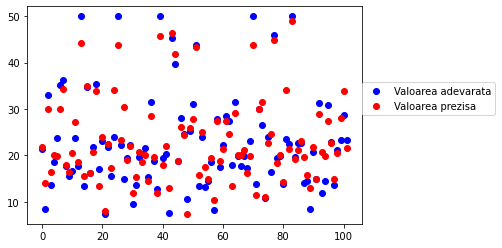

In [46]:
# Vizualizarea grafica a datelor din dataframe-ul df
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["Valoarea adevarata"], c='b', label="Valoarea adevarata")
ax.scatter(x, df["Valoarea prezisa"], c='r', label="Valoarea prezisa")
ax.legend(loc=(1, 0.5));

### 5.3. Evaluarea prin intermediul erorii medii patratice (MSE - Mean Squared Erorr) 

In [48]:
# importul functiei mean_squared_error
from sklearn.metrics import mean_squared_error

In [49]:
# determinarea erorii medii patratice
mae = mean_squared_error(y_test, y_preds)
mae

12.225875892156862

In [57]:
# elaborarea unui dataframe pentru analiza comparativa a valorilor prezise si cele adevarate
df2 = pd.DataFrame(data={"Valoarea adevarata": y_test, 
                   "Valoarea prezisa": y_preds})
df2['Diferenta'] = df2['Valoarea prezisa']-df2['Valoarea adevarata']
df2['Difer_patrat'] = df2['Diferenta']*df2['Diferenta']

df2.head()

Valoarea adevarata  Valoarea prezisa  Diferenta  Difer_patrat
464                21.4            21.800      0.400      0.160000
419                 8.4            13.931      5.531     30.591961
277                33.1            29.985     -3.115      9.703225
491                13.6            16.501      2.901      8.415801
337                18.5            19.997      1.497      2.241009

In [58]:
# Determinarea valori medii a coloanei "Difer_patrat"
df2['Difer_patrat'].mean()

12.225875892156862

### 5.4. Evaluarea modelului modificand parametrul `scoring` in `cross-validation`

In [59]:
# importul modulului cross-validation
from sklearn.model_selection import cross_val_score

In [61]:
# Pregatirea datelor si relizarea predictiei
np.random.seed(9)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor()
rf.fit(X_train, y_train);

#### a. Parametrul implicit `scoring=None`

In [64]:
# Utilizarea cross-validation cu parametrul scoring implicit (scoring=None)

np.random.seed(9)
cv_None=cross_val_score(rf, X, y, cv=5, scoring=None)
cv_None

array([0.76588712, 0.83381585, 0.73645847, 0.47554191, 0.3188976 ])

In [66]:
# afisarea valorii medii
print(f'Valoarea medie a rezultatelor cross_validation este: {np.mean(cv_None):.2f}')

Valoarea medie a rezultatelor cross_validation este: 0.63


#### b. Parametrul `scoring=r2`

In [67]:
# Utilizarea cross-validation cu parametrul scoring='r2'

np.random.seed(9)
cv_r2=cross_val_score(rf, X, y, cv=5, scoring="r2")
cv_r2

array([0.76588712, 0.83381585, 0.73645847, 0.47554191, 0.3188976 ])

In [68]:
# afisarea valorii medii
print(f'Valoarea medie a r2 in cross_validation este: {np.mean(cv_r2):.2f}')

Valoarea medie a r2 in cross_validation este: 0.63


Rezultatele in cazul scoring=None si scoring='r2' sunt acelesi adica paramatrul implicit in cazul cross-validation pentru modelele de regresie este r2

#### c. Parametrul `scoring=neg_mean_absolute_error`

In [69]:
# Utilizarea cross-validation cu parametrul scoring='neg_mean_absolute_error'

np.random.seed(9)
cv_mae=cross_val_score(rf, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.15636275, -2.6670198 , -3.46341584, -3.75931683, -3.06877228])

In [70]:
# afisarea valorii medii
print(f'Valoarea medie a mae in cross_validation este: {np.mean(cv_mae):.2f}')

Valoarea medie a mae in cross_validation este: -3.02


De ce negative : https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values

#### d. Parametrul `scoring=neg_mean_squared_error`

In [71]:
# Utilizarea cross-validation cu parametrul scoring='neg_mean_squared_error'

np.random.seed(9)
cv_mse=cross_val_score(rf, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([ -8.08513397, -15.12886585, -21.10630395, -46.00119037,
       -18.10936644])

In [72]:
# afisarea valorii medii
print(f'Valoarea medie a mse in cross_validation este: {np.mean(cv_mse):.2f}')

Valoarea medie a mse in cross_validation este: -21.69


### 5.5. Evaluarea modelului utilizand functiile de evaluare Scikit-Learn¶


In [73]:
# importul functiilor de evaluare
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [74]:
# Pregatirea datelor si implementarea modelului
np.random.seed(9)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor()
rf.fit(X_train, y_train);

In [75]:
# Realizarea predictiei
np.random.seed(9)
y_preds = model.predict(X_test)

In [77]:
# Evaluarea modelului
print("Rezultatele evaluarii modelului de regresie pe setul de test cu diferite functii::")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Rezultatele evaluarii modelului de regresie pe setul de test cu diferite functii::
R^2: 0.88
MAE: 2.41
MSE: 12.23


# 6. Imbunatatirea modelului

In [96]:
# crearea unei functii de evaluare
def evaluate_preds(y_true, y_preds):
    """
    Realizeaza evaluarea comparativa dintre y_true si y_preds
    """
    R2 = r2_score(y_true, y_preds)
    MAE = mean_absolute_error(y_true, y_preds)
    MSE = mean_squared_error(y_true, y_preds)
    metric_dict={"R^2": round(R2, 2),
                 "MAE": round(MAE, 2),
                 "MSE": round(MSE, 2)}
    print(f"R^2: {R2:.2f}")
    print(f"MAE: {MAE:.2f}")
    print(f"MSE: {MSE:.2f}")
    
    return metric_dict

In [79]:
# Pregatirea datelor si relizarea predictiei
np.random.seed(9)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [81]:
#Evaluarea modelului baseline
np.random.seed(9)
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

R^2: 0.88
MAE: 2.41
MSE: 12.23


{'R^2': 0.88, 'MAE': 2.41, 'MSE': 12.23}

In [83]:
#afisarea hiper-parametrilor ce pot fi setati
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Descrierea hiper-parametrilor (notati parametri) pentru algoritmul RandomForestClassifier poate fi gasita pe adresa: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Hyper-parametrii algoritmului RandomForestClassifier care vor fi modificati:
* `n_estimators`
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`

### 6.1. Setarea manuala a hyper-parametrilor

In [85]:
# Formarea din seturile X_train si y_train a celui de al treilea set de validare
np.random.seed(9)
X_train_param, X_valid, y_train_param, y_valid = train_test_split(X_train, 
                                                                  y_train, 
                                                                  test_size = 0.12)

In [93]:

# vizualizarea dimesiunilor celor 3 seturi: de training, de validare si de test
X_train_param.shape, X_valid.shape, X_test.shape, y_train_param.shape, y_valid.shape, y_test.shape

((355, 13), (49, 13), (102, 13), (355,), (49,), (102,))

In [94]:
#Implmentarea algoritmului RandomForestRegressor pe noile date de taining
np.random.seed(9)
rf_v=RandomForestRegressor()
rf_v.fit(X_train_param, y_train_param);

In [95]:
# Realizarea predictie pe setul de validare
np.random.seed(9)
y_preds_0 =rf_v. predict(X_valid)

In [97]:
#Evaluarea modelului pe setul de validare
np.random.seed(9)
rf_0_metrics = evaluate_preds(y_valid, y_preds_0)
rf_0_metrics

R^2: 0.88
MAE: 1.68
MSE: 4.97


{'R^2': 0.88, 'MAE': 1.68, 'MSE': 4.97}

In [98]:
# Setarea valorii parametrului n_estimators=20
np.random.seed(9)
rf_1=RandomForestRegressor(n_estimators=20)
rf_1.fit(X_train_param, y_train_param);

# Realizarea predictie pe setul de validare
y_preds_1=rf_1.predict(X_valid)

#Evaluarea modelului pe setul de validare
clf_1_metrics = evaluate_preds(y_valid, y_preds_1)
clf_1_metrics

R^2: 0.86
MAE: 1.84
MSE: 5.54


{'R^2': 0.86, 'MAE': 1.84, 'MSE': 5.54}

In [99]:
# Setarea valorii parametrului n_estimators=200
np.random.seed(9)
rf_2=RandomForestRegressor(n_estimators=200)
rf_2.fit(X_train_param, y_train_param);

# Realizarea predictie pe setul de validare
y_preds_2=rf_2.predict(X_valid)

#Evaluarea modelului pe setul de validare
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

R^2: 0.87
MAE: 1.69
MSE: 5.14


{'R^2': 0.87, 'MAE': 1.69, 'MSE': 5.14}

In [100]:
# Setarea valorii parametrului max_depth=10
np.random.seed(9)
rf_3=RandomForestRegressor(max_depth=10)
rf_3.fit(X_train_param, y_train_param);

# Realizarea predictie pe setul de validare
y_preds_3=rf_3.predict(X_valid)

#Evaluarea modelului pe setul de validare
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)
clf_3_metrics

R^2: 0.88
MAE: 1.67
MSE: 4.91


{'R^2': 0.88, 'MAE': 1.67, 'MSE': 4.91}

In [101]:
# Setarea valorii parametrului max_features='sqrt'
np.random.seed(9)
rf_4=RandomForestRegressor(max_features='sqrt')
rf_4.fit(X_train_param, y_train_param);

# Realizarea predictie pe setul de validare
y_preds_4=rf_4.predict(X_valid)

#Evaluarea modelului pe setul de validare
clf_4_metrics = evaluate_preds(y_valid, y_preds_4)
clf_4_metrics

R^2: 0.89
MAE: 1.65
MSE: 4.66


{'R^2': 0.89, 'MAE': 1.65, 'MSE': 4.66}

In [102]:
# Realizarea predictiei pe setul de test cu cel mai bun model
y_preds_test=rf_4.predict(X_test)

# Evaluarea modelului pe setul de test
manual_metrics = evaluate_preds(y_test, y_preds_test)
manual_metrics

R^2: 0.90
MAE: 2.23
MSE: 9.96


{'R^2': 0.9, 'MAE': 2.23, 'MSE': 9.96}

### 6.2. Setarea hyper-parametrilor utilizand RandomizedSearchCV

In [104]:
# importul modulului RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [105]:
# Crearea unui dictionar cu parametrii ce vor fi setati si valorile setate ale acestora
grid={'n_estimators': [10, 50, 100, 200, 500, 1000, 1200],
      'max_depth': [None, 5, 10, 20, 30],
      'max_features': ['auto', 'sqrt'], 
      'min_samples_leaf': [1, 2, 4],
      'min_samples_split': [2, 4, 6]}

In [106]:
# Divizarea datelor initiale in setul de trainig si de test (repetare)
np.random.seed(9)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
# Instantierea algoritmului RansdomForestRegressor
np.random.seed(9)
rf_r = RandomForestRegressor(n_jobs=1)

In [111]:
#Setarea RandomizedSearchCV
np.random.seed(9)
rs_rf = RandomizedSearchCV(estimator=rf_r,
                            param_distributions=grid,
                            n_iter=50, # numarul de modele incercate
                            cv=5,
                            verbose=2)

In [112]:
# Implementarea versiunii RandomizedSearchCV a modelului pe setul de 
# test initial (cand lipseste setul de validare)
np.random.seed(9)
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_e

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sq

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_fea

In [113]:
# Vizualizarea combinatie de parametri care dau rezultatul cel mai bun
rs_rf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [114]:
# Realizarea predictiie cu hyper-parametrii cei mai buni (stati deja de RandomizedSearchCV)
np.random.seed(9)
rs_y_preds=rs_rf.predict(X_test)

In [115]:
# Evaluarea modelului pe setul de test
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

R^2: 0.90
MAE: 2.26
MSE: 10.11


{'R^2': 0.9, 'MAE': 2.26, 'MSE': 10.11}

### 6.3. Setarea hyper-parametrilor utilizand GridSearchCV

In [116]:
# importul modulului GridSearchCV
from sklearn.model_selection import GridSearchCV

In [117]:
# Divizarea datelor initiale in setul de trainig si de test (repetare)
np.random.seed(9)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
# Instantierea algoritmului RansdomForestRegressor
np.random.seed(9)
rf_g = RandomForestRegressor(n_jobs=1)

In [120]:
#Setarea GridSearchCV
np.random.seed(9)
gs_rf = GridSearchCV(estimator=rf_g,
                      param_grid=grid,
                      cv=5,
                      verbose=2)

In [121]:
# Implementarea versiunii GridSearchCV a modelului pe setul de 
# test initial (cand lipseste setul de validare)
np.random.seed(9)
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 630 candidates, totalling 3150 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_es

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, m

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=Non

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.5s
[CV] END max_dep

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   1.1s
[CV] END max_dept

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=No

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   0.7s
[CV] END max_depth=None

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=None,

[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.6s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=auto

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt

In [123]:
# Vizualizarea combinatie de parametri care dau rezultatul cel mai bun
gs_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [124]:
# Realizarea predictiie cu hyper-parametrii cei mai buni (stati deja de GridSearchCV)
np.random.seed(9)
gs_y_preds=gs_rf.predict(X_test)

In [125]:
# Evaluarea modelului pe setul de test
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

R^2: 0.90
MAE: 2.26
MSE: 10.04


{'R^2': 0.9, 'MAE': 2.26, 'MSE': 10.04}

In [128]:
# Introducerea intr-un dictionar a modelelor obtinute prin setarea pe diferite cai a parametrilor
dict_metrics={'baseline': baseline_metrics,
              'manual tunning': manual_metrics,
              'random search': rs_metrics,
              'grid search': gs_metrics}
dict_metrics

{'baseline': {'R^2': 0.88, 'MAE': 2.41, 'MSE': 12.23},
 'manual tunning': {'R^2': 0.9, 'MAE': 2.23, 'MSE': 9.96},
 'random search': {'R^2': 0.9, 'MAE': 2.26, 'MSE': 10.11},
 'grid search': {'R^2': 0.9, 'MAE': 2.26, 'MSE': 10.04}}

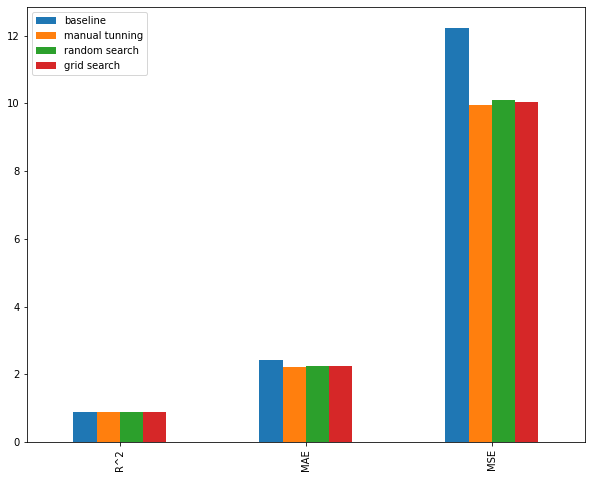

In [127]:
#Compararea grafica a modelelor din acest dictionar
compare_metrics= pd.DataFrame(dict_metrics)
compare_metrics.plot.bar(figsize=(10, 8));

# 7. Salvarea si incarcarea modelului

### 7.1. Salvarea si incarcare utilizand modului `pickle`

In [129]:
# importul modulului pickle
import pickle

In [130]:
# Salvarea unui modelului rf_4
pickle.dump(rf_4, open("manual_random-forest_model_1.pkl", "wb"))

In [131]:
# incarcarea modelului salvat .pkl
loaded_pickle_model = pickle.load(open("manual_random-forest_model_1.pkl", "rb"))

In [132]:
# realizarea predictie cu modelul incarcat
pickle_y_preds = loaded_pickle_model.predict(X_test)

In [133]:
# evaluarea modelului
evaluate_preds(y_test, pickle_y_preds)

R^2: 0.90
MAE: 2.23
MSE: 9.96


{'R^2': 0.9, 'MAE': 2.23, 'MSE': 9.96}

### 7.2. Salvarea si incarcare utilizand modului `joblib`

In [134]:
# importul functiilor modulului joblib
from joblib import dump, load

In [135]:
# Salvarea unui modelului rs_clf
dump(gs_rf, filename = "gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [136]:
# incarcarea modelului salvat .joblib
loaded_joblib_model = load(filename = "gs_random_forest_model_1.joblib")

In [137]:
# realizarea predictie cu modelul incarcat
joblib_y_preds = loaded_joblib_model.predict(X_test)

In [138]:
# evaluarea modelului
evaluate_preds(y_test, joblib_y_preds)

R^2: 0.90
MAE: 2.26
MSE: 10.04


{'R^2': 0.9, 'MAE': 2.26, 'MSE': 10.04}